In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare the Data

In [2]:
# Read the data
ratings_df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_3/datasets/ratings.txt",
                         sep=" ",
                         header=None,
                         names=["user_id", "movie_id", "rating"])
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [3]:
# Remove duplicates on user_id and movie_id, keeping the last row
ratings_df = ratings_df.drop_duplicates(subset=["user_id", "movie_id"], keep="last")
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [4]:
# Pivot the DataFrame and fill NAs
ratings_matrix = ratings_df.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)
ratings_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,3.5,3.0,4.0,3.5,3.5,3.0,2.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,3.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1505,4.0,3.0,2.0,3.0,4.0,0.0,4.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Create variable for normalization
# Ratings are between 0-5
normalization_factor = 5

# Normalize the ratings
normalized_ratings = ratings_matrix / normalization_factor
normalized_ratings

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.4,0.8,0.7,0.6,0.8,0.7,0.7,0.6,0.5,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,0.6,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1505,0.8,0.6,0.4,0.6,0.8,0.0,0.8,0.6,0.8,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train = normalized_ratings.values
X_train

array([[0.4, 0.8, 0.7, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       [0.3, 0.6, 0.4, ..., 0. , 0. , 0. ]])

## Train the Model

In [7]:
# Set the number of neurons for the layers


# Set the bias of the visible layer to 0. This should use the number of unique movies.


# Set the bias of the hidden layer to 0. This will use hiddenUnits, which is
# the number of features we're going to learn


# Set the Weights to 0


In [8]:
v0 = tf.zeros([visibleUnits], tf.float32)
# testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [9]:
# Phase 1: Input Processing
# Define a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    # probabilities of the hidden units
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)
    # sample_h_given_X
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state

# Print output of zeros input
h0 = hidden_layer(v0, W, hidden_layer_bias)
print("first 15 hidden states: ", h0[0][0:15])

# Define a function to return the reconstructed output
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    # sample_v_given_h
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

# Get reconstructed output from zeros input
v1 = reconstructed_output(h0, W, visible_layer_bias)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (2071,)
v1 state shape:   (2071,)


In [10]:
# Set the error function, which in this case will be the Mean Absolute Error Function.
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.4751328


Epoch: 1 batch #: 0  of 7 sample #: 199 reconstruction error: 0.014466
Epoch: 1 batch #: 1  of 7 sample #: 199 reconstruction error: 0.004539
Epoch: 1 batch #: 2  of 7 sample #: 199 reconstruction error: 0.004365
Epoch: 1 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008542
Epoch: 1 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008696
Epoch: 1 batch #: 5  of 7 sample #: 199 reconstruction error: 0.008397
Epoch: 1 batch #: 6  of 7 sample #: 199 reconstruction error: 0.002168
Epoch: 1 batch #: 7  of 7 sample #: 107 reconstruction error: 0.006832
Epoch: 2 batch #: 0  of 7 sample #: 199 reconstruction error: 0.012728
Epoch: 2 batch #: 1  of 7 sample #: 199 reconstruction error: 0.002897
Epoch: 2 batch #: 2  of 7 sample #: 199 reconstruction error: 0.003399
Epoch: 2 batch #: 3  of 7 sample #: 199 reconstruction error: 0.007673
Epoch: 2 batch #: 4  of 7 sample #: 199 reconstruction error: 0.007344
Epoch: 2 batch #: 5  of 7 sample #: 199 reconstruction error: 0.009845
Epoch:

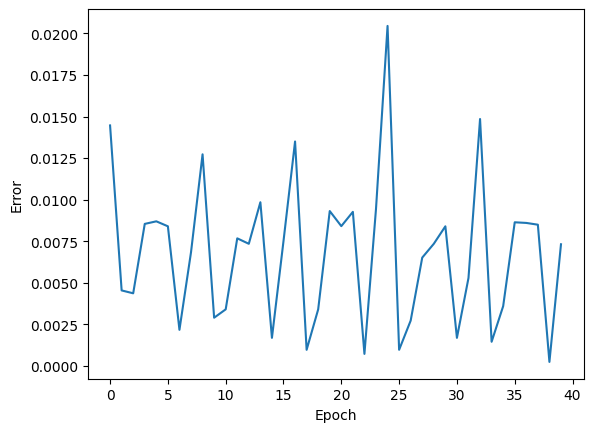

In [11]:
# Set the training variables


# Create dataset batches



v0_state=v0

# Train the model
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hidden_layer_bias)
                v1_state = reconstructed_output(h0_state, W, visible_layer_bias)
                h1_state = hidden_layer(v1_state, W, hidden_layer_bias)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

                # Update weights
                W = W + alpha * delta_W

                # Update biases
                visible_layer_bias = visible_layer_bias + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hidden_layer_bias = hidden_layer_bias + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1),
                       "batch #: %i " % batch_number, "of %i" % (len(X_train)/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1

# Plot the errors
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

## Save Model

In [12]:
# Collect the weights and biases so we can rebuild the model without re-training


Weights:  tf.Tensor(
[[ 0.13000354 -0.55000585 -1.0400009  ...  0.8200099  -1.450004
   0.45000368]
 [-0.08000347  0.7899914   0.13000403 ...  1.310044   -1.5399967
   0.43999597]
 [-0.30999586  0.07000306 -1.1800002  ...  0.56999415 -2.8599994
   0.88999784]
 ...
 [-0.55       -0.54999995 -0.05000001 ... -0.75       -0.10000001
  -0.65      ]
 [-0.42       -0.50000006 -0.19999999 ... -0.8000001   0.24000001
  -0.6       ]
 [-0.35999998 -0.39999998 -0.4        ... -0.70000005 -0.4
  -0.5       ]], shape=(2071, 20), dtype=float32)
Hidden Layer Biases:  tf.Tensor(
[ 0.70000017  6.9999957   7.499995    3.1999993  15.500023   12.10001
 -0.99999994  7.599995    2.0000005  11.000006   -0.09999987  4.499998
 -1.7        10.100002   -0.3999998   0.20000014 -0.3999998  13.100014
  3.8999987  10.200003  ], shape=(20,), dtype=float32)
Visible Layer Biases:  tf.Tensor([-2.3803024 -2.3803024 -2.3803024 ... -2.3803024 -2.3803024 -2.3803024], shape=(2071,), dtype=float32)


In [13]:
# Convert the weights into a Pandas DataFrame


# Save weights to CSV


In [14]:
# Convert the biases to Pandas DataFrame and export to CSVs


## Retrieve Model

In [15]:
# Read weights and convert back to Tensor


<tf.Tensor: shape=(2071, 20), dtype=float32, numpy=
array([[ 0.13000354, -0.55000585, -1.0400009 , ...,  0.8200099 ,
        -1.450004  ,  0.45000368],
       [-0.08000347,  0.7899914 ,  0.13000403, ...,  1.310044  ,
        -1.5399967 ,  0.43999597],
       [-0.30999586,  0.07000306, -1.1800002 , ...,  0.56999415,
        -2.8599994 ,  0.88999784],
       ...,
       [-0.55      , -0.54999995, -0.05000001, ..., -0.75      ,
        -0.10000001, -0.65      ],
       [-0.42      , -0.50000006, -0.19999999, ..., -0.8000001 ,
         0.24000001, -0.6       ],
       [-0.35999998, -0.39999998, -0.4       , ..., -0.70000005,
        -0.4       , -0.5       ]], dtype=float32)>

In [16]:
# Read hidden layer biases and convert back to Tensor


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.70000017,  6.9999957 ,  7.499995  ,  3.1999993 , 15.500023  ,
       12.10001   , -0.99999994,  7.599995  ,  2.0000005 , 11.000006  ,
       -0.09999987,  4.499998  , -1.7       , 10.100002  , -0.3999998 ,
        0.20000014, -0.3999998 , 13.100014  ,  3.8999987 , 10.200003  ],
      dtype=float32)>

In [17]:
# Read visible layer biases and convert back to Tensor


<tf.Tensor: shape=(2071,), dtype=float32, numpy=
array([-2.3803024, -2.3803024, -2.3803024, ..., -2.3803024, -2.3803024,
       -2.3803024], dtype=float32)>

## Test Model Recommendations

In [18]:
# Create a function to reconstruct ratings data


In [19]:
# Test recommendation


<tf.Tensor: shape=(1, 2071), dtype=float32, numpy=
array([[3.1639344e-01, 6.4944839e-01, 2.5804213e-01, ..., 1.6242464e-04,
        2.6556733e-04, 8.3828246e-04]], dtype=float32)>

In [20]:
# Convert recommendation to DataFrame


# Sort recommendations


,movie_id,user_id,RecommendationScore
214,215,1024,0.924097
10,11,1024,0.857634
211,212,1024,0.802491
8,9,1024,0.779303
12,13,1024,0.739550
4,5,1024,0.738329
251,252,1024,0.734466
9,10,1024,0.725765
253,254,1024,0.702583
210,211,1024,0.699687


In [21]:
# Merge recommendation scores with original dataset ratings


,movie_id,user_id,RecommendationScore,rating
214,215,1024,0.924097,4.0
10,11,1024,0.857634,3.5
211,212,1024,0.802491,0.5
8,9,1024,0.779303,3.0
12,13,1024,0.739550,3.5
4,5,1024,0.738329,NaN
251,252,1024,0.734466,NaN
9,10,1024,0.725765,2.5
253,254,1024,0.702583,4.0
210,211,1024,0.699687,NaN
